In [20]:
import regex as re
import numpy as np
import matplotlib.pyplot as plt

In [31]:
with open("log.txt") as file:
    hist=file.read()

In [32]:
log=[]
L={}
for level in np.unique(re.findall("l=[0-9]{1,2}", hist)):
    L[level]=[]
for ti,t in enumerate(hist.split("\n")):
    z = re.findall("\sS:\s[0-9]*",t)
    if len(z)>0:
        z=re.findall("[0-9]{1,}",z[0])
        log.append(int(z[0]))
    B = re.findall("B=[0-9]*", t)
    l = re.findall("l=[0-9]*",t)
    if len(B)>0:
        if len(l)>0:
            for lk in L.keys():
                if l[0]==lk:
                    L[l[0]].append(int(B[0][2:]))
                else:
                    L[lk].append(np.nan)

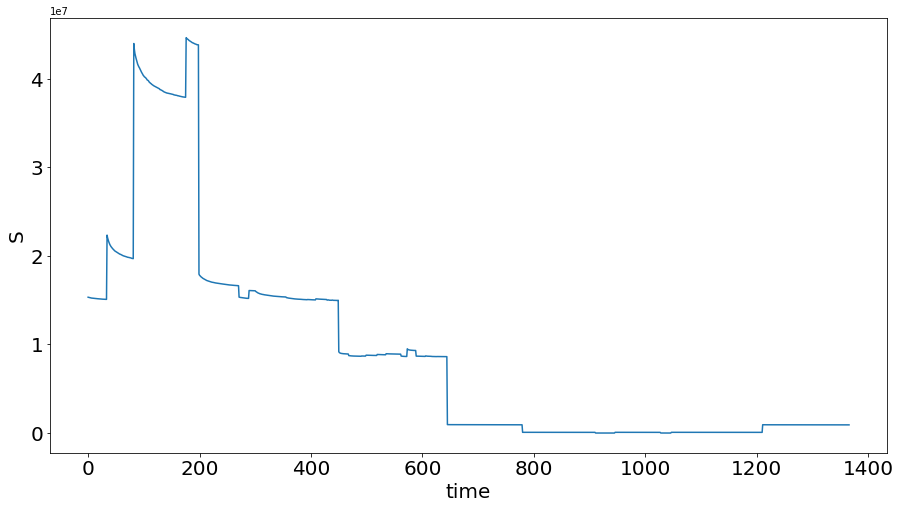

In [33]:
fig=plt.figure(figsize=(15,8))
plt.plot(log)
plt.tick_params(labelsize=20)
plt.xlabel('time', fontsize=20)
plt.ylabel("S", fontsize=20)
plt.show()
fig.savefig("S_hist.pdf")

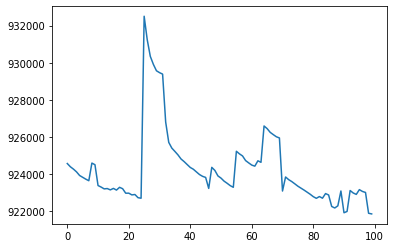

In [34]:
plt.plot(log[-100:])

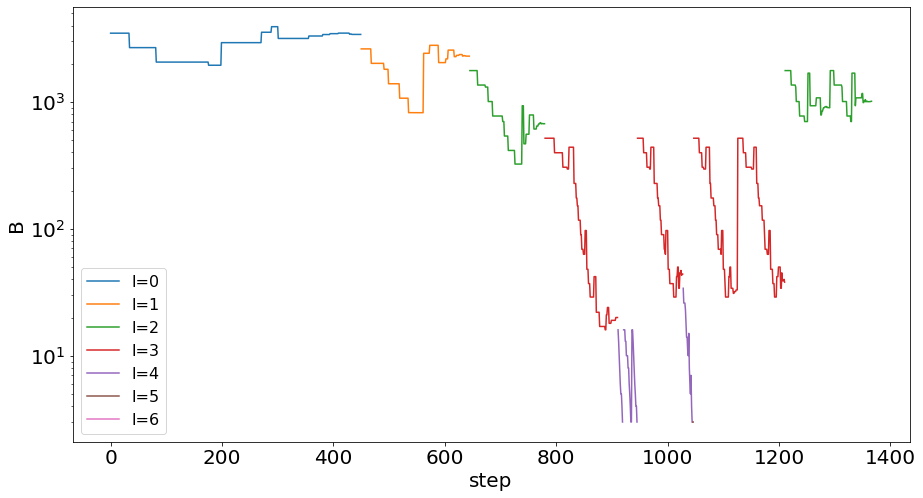

In [37]:
fig=plt.figure(figsize=(15,8))
for l in L.keys():
    plt.plot(L[l], label=l)
plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel("B", fontsize=20)
plt.legend(fontsize=16)
plt.yscale('log')
plt.show()
fig.savefig("B_hist.pdf")